# Implementing Membership Inference Attack on Breast Cancer Data

In [1]:
from mblearn import AttackModels, ShadowModels

In [2]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from numpy import genfromtxt

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

 We use the data from the UCI Machine Learning repository(https://archive.ics.uci.edu/ml/datasets/breast+cancer). The breast cancer dataset of 9 features. These are
 1. age
 2. menopause
 3. tumor-size
 4. inv-nodes
 5. node-caps
 6. deg-malig
 7. breast
 8. breast-quad
 9. irradiat
 
 The 10th attribute is Class which contains either the value 'no-recurrence-events' or 'recurrence-events'. This is the variable which the model tries to predict given the breast cancer-data for a patient. 

 The dataset to begin with contains 286 records but has to be cleaned since there is noise as well as missing values.
 
 The final clean dataset contains 186 records.

In [4]:
data = pd.read_csv("data.csv")

In [5]:
data.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [6]:
data['age'] = le.fit_transform(data['age'])
data['menopause'] = le.fit_transform(data['menopause'])
data['tumor-size'] = le.fit_transform(data['tumor-size'])
data['inv-nodes'] = le.fit_transform(data['inv-nodes'])
data['node-caps'] = le.fit_transform(data['node-caps'])
data['deg-malig'] = le.fit_transform(data['deg-malig'])
data['breast'] = le.fit_transform(data['breast'])
data['breast-quad'] = le.fit_transform(data['breast-quad'])
data['irradiat'] = le.fit_transform(data['irradiat'])
data['Class'] = le.fit_transform(data['Class'])

Spliting the data into X(data) and Y(label).

In [7]:
X= data.iloc[:,data.columns != 'Class'].to_numpy()
Y= data.iloc[:,data.columns == 'Class'].to_numpy()

We will now divide the data into two disjoint sets. One for training (train) and the other for testing(test). We will keep 80% for training and 20% for testing.

In [8]:
Y_new = np.squeeze(Y, axis = 1)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, Y_new, test_size=0.3)
print('Train samples:', len(x_train))
print('Test samples:', len(x_test))

Train samples: 130
Test samples: 56


From the training data obtained earlier we will create data for training both the target model as well as the shadow models. 
Similarly we will create test data for both the target and shadow models from the testing data obtained earlier.

In [10]:
x_target_train, x_attack_train, y_target_train, y_attack_train = train_test_split(x_train, y_train, test_size=0.3)
x_target_test, x_attack_test, y_target_test, y_attack_test = train_test_split(x_test, y_test, test_size=0.3)
print('Train samples: Target', len(x_target_train))
print('Train sample: Attack:', len(x_attack_train))
print('Test sample: Target:', len(x_target_test))
print('Test sample: Attack:', len(x_attack_test))

Train samples: Target 91
Train sample: Attack: 39
Test sample: Target: 39
Test sample: Attack: 17


## Creating the target model. 
We use a random Forest Classifier as the learner for our target models.
We create 3 target models: 
1. rf_target : Number of trees = 100
2. rf_target_1 : Number of trees = 30
3. rf_target_2 : Number of trees = 5

In [11]:
rf_target = RandomForestClassifier(n_estimators=100)

In [12]:
rf_target_1 = RandomForestClassifier(n_estimators=30)

In [13]:
rf_target_2 = RandomForestClassifier(n_estimators=5)

Next, we training all three target modela with the training data created earlier.

In [14]:
rf_target.fit(x_target_train, y_target_train);

In [15]:
rf_target_1.fit(x_target_train, y_target_train);

In [16]:
rf_target_2.fit(x_target_train, y_target_train);

## Creating the shadow models.
We create 2 shadow models. Both of the models use the same learner as the target model, i.e, random forest classifier. 

In [17]:
shadow_learner =  RandomForestClassifier(n_estimators=100)

In [18]:
shadow_learner_1 =  RandomForestClassifier(n_estimators=30)

In [19]:
shadow_learner_2 =  RandomForestClassifier(n_estimators=5)

In [20]:
sh = ShadowModels(x_attack_train, y_attack_train, n_models=2, target_classes=2, learner=shadow_learner)

using sklearn shadow models


In [21]:
sh_1 = ShadowModels(x_attack_train, y_attack_train, n_models=2, target_classes=2, learner=shadow_learner_1)

using sklearn shadow models


In [22]:
sh_2 = ShadowModels(x_attack_train, y_attack_train, n_models=2, target_classes=2, learner=shadow_learner_2)

using sklearn shadow models


In [23]:
shadow_data = sh.results

In [24]:
shadow_data_2 = sh_1.results

In [25]:
shadow_data_3 = sh_2.results

In [26]:
shadow_data

array([[0.25, 0.75, 1.  , 1.  ],
       [0.84, 0.16, 0.  , 1.  ],
       [0.92, 0.08, 0.  , 1.  ],
       [0.19, 0.81, 1.  , 1.  ],
       [0.97, 0.03, 0.  , 1.  ],
       [0.89, 0.11, 0.  , 1.  ],
       [0.81, 0.19, 0.  , 1.  ],
       [0.94, 0.06, 0.  , 1.  ],
       [0.83, 0.17, 0.  , 1.  ],
       [0.58, 0.42, 0.  , 0.  ],
       [0.6 , 0.4 , 0.  , 0.  ],
       [0.45, 0.55, 0.  , 0.  ],
       [0.42, 0.58, 0.  , 0.  ],
       [0.38, 0.62, 1.  , 0.  ],
       [0.67, 0.33, 0.  , 0.  ],
       [0.97, 0.03, 0.  , 0.  ],
       [0.38, 0.62, 1.  , 0.  ],
       [0.76, 0.24, 1.  , 0.  ],
       [0.63, 0.37, 1.  , 0.  ],
       [0.8 , 0.2 , 0.  , 1.  ],
       [0.88, 0.12, 0.  , 1.  ],
       [0.8 , 0.2 , 0.  , 1.  ],
       [0.19, 0.81, 1.  , 1.  ],
       [0.93, 0.07, 0.  , 1.  ],
       [0.26, 0.74, 1.  , 1.  ],
       [0.22, 0.78, 1.  , 1.  ],
       [0.91, 0.09, 0.  , 1.  ],
       [0.81, 0.19, 0.  , 1.  ],
       [0.53, 0.47, 0.  , 0.  ],
       [0.82, 0.18, 0.  , 0.  ],
       [0.

# Attack model

Now we create the attack model. We again use a random forest classifier as the learner for the attack model.

In [27]:
rf_attack = RandomForestClassifier(n_estimators=100)

In [28]:
attacker = AttackModels(target_classes=2, attack_learner=rf_attack)

In [29]:
attacker_2 = AttackModels(target_classes=2, attack_learner=rf_attack)

In [30]:
attacker_3 = AttackModels(target_classes=2, attack_learner=rf_attack)

In [31]:
attacker.fit(shadow_data)

In [32]:
attacker_2.fit(shadow_data_2)

In [33]:
attacker_3.fit(shadow_data_3)

To evaluate the attack model created we use a new dataset. The dataset contains records drawn randomly from the training and test dataset of the target model in equal proportions(50-50).

In [34]:
train_idx = np.random.choice(np.arange(len(x_target_train)), len(x_target_test))

In [35]:
X_train_1 = x_target_train[train_idx]

In [36]:
y_train_1 = y_target_train[train_idx]

In [37]:
print(len(X_train_1), len(y_train_1))

39 39


We use the dataset generated: X_train_1,y_train_1 to get the predictions of the three target models.

In [38]:
X_in = rf_target.predict_proba(X_train_1)

In [73]:
X_in

array([[1.        , 0.        ],
       [0.9725    , 0.0275    ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.99      , 0.01      ],
       [1.        , 0.        ],
       [0.27      , 0.73      ],
       [1.        , 0.        ],
       [0.27      , 0.73      ],
       [0.97      , 0.03      ],
       [0.96      , 0.04      ],
       [0.92      , 0.08      ],
       [0.873     , 0.127     ],
       [0.27      , 0.73      ],
       [0.21      , 0.79      ],
       [1.        , 0.        ],
       [0.96      , 0.04      ],
       [0.98      , 0.02      ],
       [1.        , 0.        ],
       [0.27      , 0.73      ],
       [0.26      , 0.74      ],
       [0.34      , 0.66      ],
       [0.21      , 0.79      ],
       [0.92083333, 0.07916667],
       [0.97      , 0.03      ],
       [0.26      , 0.74      ],
       [0.87      , 0.13      ],
       [0.89      , 0.11      ],
       [0.98      , 0.02      ],
       [0.

In [39]:
X_in_1 = rf_target_1.predict_proba(X_train_1)

In [40]:
X_in_2 = rf_target_2.predict_proba(X_train_1)

In [41]:
y_train_1

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

The predictions of the three target models are then used as input for the attack model, to get the predictions of the attack model.   

In [42]:
res_in = attacker.predict(X_in, y_train_1, batch=True)

In [43]:
res_in_1 = attacker_2.predict(X_in_1, y_train_1, batch=True)

In [44]:
res_in_2 = attacker_3.predict(X_in_2, y_train_1, batch=True)

In [75]:
res_in

array([[0.7155    , 0.2845    ],
       [0.4905    , 0.5095    ],
       [0.7155    , 0.2845    ],
       [0.7155    , 0.2845    ],
       [0.7155    , 0.2845    ],
       [0.7155    , 0.2845    ],
       [0.7155    , 0.2845    ],
       [0.7155    , 0.2845    ],
       [0.4905    , 0.5095    ],
       [0.4305    , 0.5695    ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.7155    , 0.2845    ],
       [0.4305    , 0.5695    ],
       [0.59733333, 0.40266667],
       [0.7155    , 0.2845    ],
       [0.        , 1.        ],
       [0.4905    , 0.5095    ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.59733333, 0.40266667],
       [0.        , 1.        ],
       [0.35930952, 0.64069048],
       [0.7155    , 0.2845    ],
       [0.4905    , 0.5095    ],
       [0.        , 1.        ],
       [0.4305    , 0.5695    ],
       [0.0575    , 0.9425    ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.

We do the same for the data which is part of the test dataset.

In [45]:
X_out = rf_target.predict_proba(x_target_test)

In [46]:
X_out_1 = rf_target_1.predict_proba(x_target_test)

In [47]:
X_out_2 = rf_target_2.predict_proba(x_target_test)

In [48]:
res_out = attacker.predict(X_out, y_target_test, batch=True)

In [49]:
res_out_1 = attacker_2.predict(X_out_1, y_target_test, batch=True)

In [50]:
res_out_2 = attacker_3.predict(X_out_2, y_target_test, batch=True)

Now we generate the scores for the attack model predictions for the three target models 

In [51]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [52]:
y_pred = np.concatenate((np.argmax(res_in, axis=1), np.argmax(res_out, axis=1)))
y_pred_1 = np.concatenate((np.argmax(res_in_1, axis=1), np.argmax(res_out_1, axis=1)))
y_pred_2 = np.concatenate((np.argmax(res_in_2, axis=1), np.argmax(res_out_2, axis=1)))
y_true = np.concatenate((np.ones_like(y_train_1), np.zeros_like(y_target_test)))

In [53]:
precision_score(y_true, y_pred)

0.65

In [54]:
precision_score(y_true, y_pred_1)

0.5818181818181818

In [55]:
precision_score(y_true, y_pred_2)

0.7209302325581395

In [56]:
recall_score(y_true, y_pred)

0.6666666666666666

In [57]:
recall_score(y_true, y_pred_1)

0.8205128205128205

In [58]:
recall_score(y_true, y_pred_2)

0.7948717948717948

In [59]:
f1_score(y_true, y_pred)

0.6582278481012659

In [60]:
f1_score(y_true, y_pred_1)

0.6808510638297872

In [61]:
f1_score(y_true, y_pred_2)

0.7560975609756098

In [63]:
import matplotlib.pyplot as plt

The plot depicts the variation in the F1 score values with the increase in overfitting

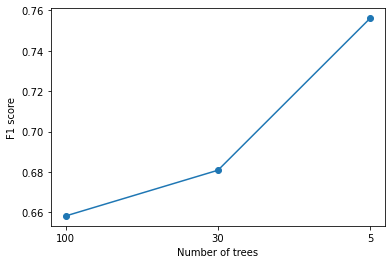

In [64]:
plt.plot([ "100", "30", "5"],[0.6582278481012659, 0.6808510638297872, 0.7560975609756098],'-o')
#plt.ylim(0.7,0.8)
plt.xlabel('Number of trees')
plt.ylabel('F1 score')
plt.show()